# Supervised Machine Learning
### Linear Regression, Kernel-Ridge Regression and Support Vector Regression

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
import scipy.linalg

In [5]:
from sklearn import linear_model
from sklearn import model_selection, neighbors, tree, ensemble

The sklearn supervised learning functions are organized into several modules:
 - [linear_model](http://scikit-learn.org/stable/modules/linear_model.html): regression with [generalized linear models](https://en.wikipedia.org/wiki/Generalized_linear_model).
 - [kernel_ridge](http://scikit-learn.org/stable/modules/kernel_ridge.html): ridge regression using the kernel trick.
 - [svm](http://scikit-learn.org/stable/modules/svm.html): regression, classification (and outlier detection) with [support vector machines](https://en.wikipedia.org/wiki/Support_vector_machine).
 - [tree](http://scikit-learn.org/stable/modules/tree.html): regression and classification using [decision trees](https://en.wikipedia.org/wiki/Decision_tree).
 - [discriminant_analysis](http://scikit-learn.org/stable/modules/lda_qda.html): classification using [linear](https://en.wikipedia.org/wiki/Linear_discriminant_analysis) and [quadratic](https://en.wikipedia.org/wiki/Quadratic_classifier) discriminant analysis.
 - [ensemble](http://scikit-learn.org/stable/modules/ensemble.html): regression, classification (and anomaly detection) using [ensemble methods](https://en.wikipedia.org/wiki/Ensemble_learning).
 - [gaussian_process](http://scikit-learn.org/stable/modules/gaussian_process.html): regression and classification using [Gaussian processes](https://en.wikipedia.org/wiki/Gaussian_process).
 - [naive_bayes](http://scikit-learn.org/stable/modules/naive_bayes.html): Bayesian classification with [oversimplified assumptions](https://en.wikipedia.org/wiki/Naive_Bayes_classifier).


### Linear Regression

A standard linear regression assumes the observed data $D = (X,Y)$ is explained by the model,
$$
Y = X W + \delta Y \; ,
$$
where, in general, all quantities are matrices, the model parameters are the elements of $W$, and $\delta Y$ is the "noise" inherent in $Y$.

#### Example: fitting a line

Let us generate a random dataset for linear regression with added noise,


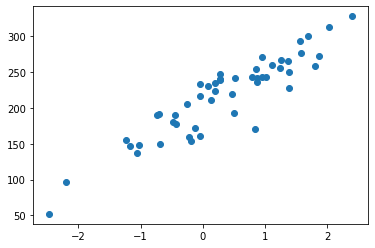

In [75]:
from sklearn.datasets import make_regression
gen = np.random.RandomState(seed=246)
#change seed value to get a completely different dataset. 
# generate regression dataset
X, y = make_regression(n_samples=50, n_features=1, noise=20, bias =200, random_state=gen)
#No. of sample and noise can be changed 
plt.scatter(X,y)
plt.show()

More options can be specified to characterize the data using [make_regression](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html).



The `LinearRegression` function solves the [linear least squares problem](https://en.wikipedia.org/wiki/Linear_least_squares_%28mathematics%29) by minimizing sum of squared residuals
$$
S \equiv \sum_{i=1}^N \left| Y_i - (X W)_i \right|^2
$$
with respect to the model parameters (elements of $W$), where $i$ indexes the $N$ samples in the dataset. The syntax will be familiar from the sklearn functions we used earlier:

In [ ]:
fit = linear_model.LinearRegression(fit_intercept=True).fit(X, y)

`LinearRegression` will automatically calculate and subtract any non-zero mean of $y$ when `fit_intercept` is `True`.

The resulting $W$ matrix has only a single element, the slope of the line:

In [44]:
W = fit.coef_
y0 = fit.intercept_
print('Coefficient: \n', W)
print('Intercept:\n ', y0)

Coefficient: 
 [48.00423751]
Intercept:
  200.96335893010624


In [45]:
y_predicted = fit.predict(X)
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error: %.2f"
      % mean_squared_error(y, y_predicted))
print('r_2 statistic: %.2f' % r2_score(y, y_predicted))

Mean squared error: 486.14
r_2 statistic: 0.84


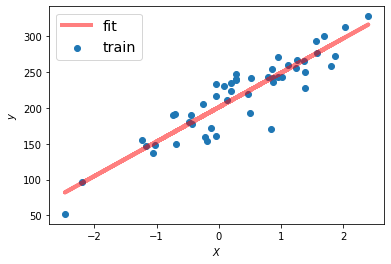

In [47]:
plt.scatter(X, y, label='train')
plt.plot(X, X.dot(W) + y0, 'r-', lw=4, alpha=0.5, label='fit')
plt.legend(fontsize='x-large')
plt.xlabel('$X$')
plt.ylabel('$y$')
plt.show()


#### Generating data for linear regression and checking the fit

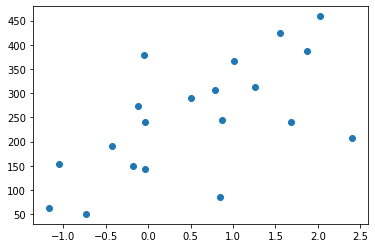

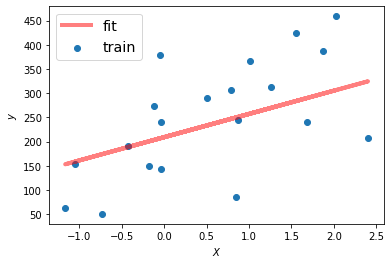

Mean squared error: 8291.87
r_2 statistic: 0.39


In [93]:
gen = np.random.RandomState(seed=246)
X_1, y_1 = make_regression(n_samples=20, n_features=1, noise=100, bias =200, random_state=gen)
plt.scatter(X_1,y_1)
plt.show()

fit_1 = linear_model.LinearRegression(fit_intercept=True).fit(X_1, y_1)
W_1 = fit_1.coef_
y0_1 = fit_1.intercept_
plt.scatter(X_1, y_1, label='train')
plt.plot(X_1, X_1.dot(W) + y0_1, 'r-', lw=4, alpha=0.5, label='fit')
plt.legend(fontsize='x-large')
plt.xlabel('$X$')
plt.ylabel('$y$')
plt.show()

y_1predicted = fit_1.predict(X_1)
print("Mean squared error: %.2f"
      % mean_squared_error(y_1, y_1predicted))
print('r_2 statistic: %.2f' % r2_score(y_1, y_1predicted))

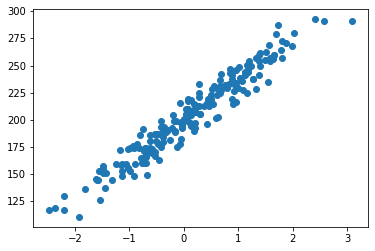

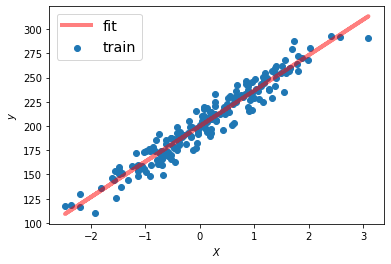

Mean squared error: 93.95
r_2 statistic: 0.94


In [94]:
gen = np.random.RandomState(seed=246)
X_2, y_2 = make_regression(n_samples=200, n_features=1, noise=10, bias =200, random_state=gen)
plt.scatter(X_2,y_2)
plt.show()

fit_2 = linear_model.LinearRegression(fit_intercept=True).fit(X_2, y_2)
W_2 = fit_2.coef_
y0_2 = fit_2.intercept_
plt.scatter(X_2, y_2, label='train')
plt.plot(X_2, X_2.dot(W_2) + y0_2, 'r-', lw=4, alpha=0.5, label='fit')
plt.legend(fontsize='x-large')
plt.xlabel('$X$')
plt.ylabel('$y$')
plt.show()

y_2predicted = fit_2.predict(X_2)
print("Mean squared error: %.2f"
      % mean_squared_error(y_2, y_2predicted))
print('r_2 statistic: %.2f' % r2_score(y_2, y_2predicted))

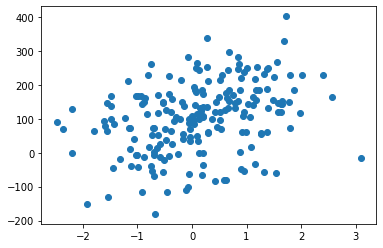

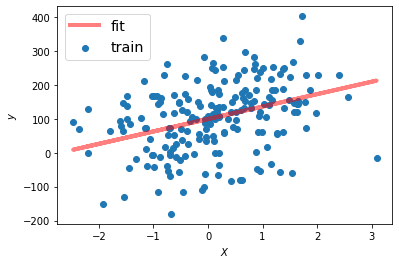

Mean squared error: 9394.98
r_2 statistic: 0.12


In [95]:
gen = np.random.RandomState(seed=246)
X_3, y_3 = make_regression(n_samples=200, n_features=1, noise=100, bias =100, random_state=gen)
plt.scatter(X_3,y_3)
plt.show()

fit_3 = linear_model.LinearRegression(fit_intercept=True).fit(X_3, y_3)
W_3 = fit_3.coef_
y0_3 = fit_3.intercept_
plt.scatter(X_3, y_3, label='train')
plt.plot(X_3, X_3.dot(W_2) + y0_3, 'r-', lw=4, alpha=0.5, label='fit')
plt.legend(fontsize='x-large')
plt.xlabel('$X$')
plt.ylabel('$y$')
plt.show()

y_3predicted = fit_3.predict(X_3)
print("Mean squared error: %.2f"
      % mean_squared_error(y_3, y_3predicted))
print('r_2 statistic: %.2f' % r2_score(y_3, y_3predicted))


Can you figure out what noise and bias are doing? Change these quantities and try it out youself. Also, what if we change the random_state variable?

Also, what can you conclude from the mean-square error and r_2 values in each case?

Now we will look at linear regression from machine-learning perspective:

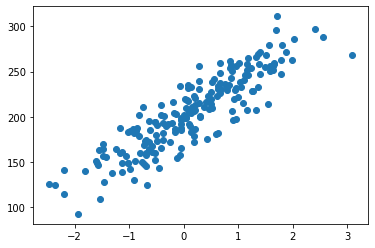

In [104]:
gen = np.random.RandomState(seed=246)
X_4, y_4 = make_regression(n_samples=200, n_features=1, noise=20, bias =200, random_state=gen)
plt.scatter(X_4,y_4)
plt.show()

Let us split the data into two equal training set and test set, 

In [109]:
gen = np.random.RandomState(seed=123)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_4, y_4, test_size=.50, random_state=gen)


In [110]:
fit_4 = linear_model.LinearRegression(fit_intercept=True).fit(X_train, y_train)
W_4 = fit_4.coef_
y0_4 = fit_4.intercept_

In [112]:
y_trainP = fit.predict(X_train)
print("Mean squared error: %.2f"
      % mean_squared_error(y_train, y_trainP))
print('r_2 statistic: %.2f' % r2_score(y_train, y_trainP))

Mean squared error: 536.80
r_2 statistic: 0.74


We then use the model to make predictions based on the test values of x


Now, we can calculate the models accuracy metrics based on what the actual value of y was

In [113]:
y_pred = fit.predict(X_test)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
print('r_2 statistic: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 507.84
r_2 statistic: 0.65


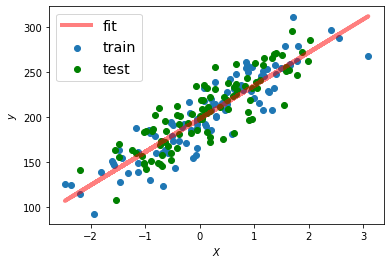

In [115]:
plt.scatter(X_train, y_train, label='train')
plt.plot(X_train, X_train.dot(W_4) + y0_4, 'r-', lw=4, alpha=0.5, label='fit')
plt.scatter(X_test, y_test, c='green', label='test', lw=1)
plt.legend(fontsize='x-large')
plt.xlabel('$X$')
plt.ylabel('$y$')
plt.show()


#### Example: basis function linear regression

Taken from **Phys 247** taught by Prof. D. Kirkby

For our final example, we will see how "linear" regression can solve problems that appear quite nonlinear. Suppose our model is
$$
Y = a X e^{-X^2} + b \sin X^2 + \delta Y
$$
with unknown parameters $a$ and $b$:

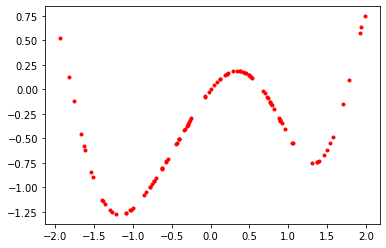

In [11]:
def generate(N=100, xlo=-2, xhi=2, a=1, b=-1, seed=123):
    gen = np.random.RandomState(seed=seed)
    X1 = gen.uniform(xlo, xhi, N)
    y1 = a * X1 * np.exp(-X1 ** 2) + b * np.sin(X1 ** 2)
    plt.plot(X1, y1, 'r.')
    return X1, y1

X1, y1 = generate()

If we replace the $N\times 1$ dataset $X$ with a $N\times 2$ dataset $Z$ of new features $(Z_1, Z_2)$:
$$
Z_1 = X e^{-X^2}  \quad, \quad Z_2 = \sin X^2 \; ,
$$
the transformed model is now linear:
$$
Y = X W
$$
with
$$
W = \begin{bmatrix}
a \\ b
\end{bmatrix} \; .
$$
The new features $Z_1$ and $Z_2$ are known as "basis functions" and this approach is called "basis function regression".  Sklearn has built-in support for [polynomial basis functions](http://scikit-learn.org/stable/modules/linear_model.html#polynomial-regression-extending-linear-models-with-basis-functions) but it is easy to apply the transformations yourself for arbitrary basis functions:

In [12]:
Z = np.stack([X1 * np.exp(-X1 ** 2), np.sin(X1 ** 2)], axis=1)
Z.shape

(100, 2)

In [13]:
fit = linear_model.LinearRegression(fit_intercept=False).fit(Z, y1)
print(fit.coef_)

[ 1. -1.]


### Multivariate Regression

**Coming soon**

### Kernel Ridge Regression

### Support Vector Machines

### Gaussian Process Regression